## WORLD POPULATION AND HEALTH ANALYSIS(2014-2023): Exploring Global Mortality Trends, Disease Prevalence, and Healthcare Efficiency.

## OBJECTIVE: 

Despite advancements in global healthcare, differences in health outcomes persist across different countries. Factors such as healthcare expenditure, disease prevalence, undernourishment, and population growth influence key health indicators, including life expectancy and mortality rates. However, the extent of their impact remains unclear, particularly in countries with limited healthcare resources.  

This analysis aims to investigate trends in global population and health data from 2014 to 2023, identifying patterns in mortality rates, disease prevalence, and healthcare investments. By understanding these relationships, the study seeks to provide insights that can guide policy decisions and improve overall health outcomes.

## OBJECTIVE QUESTIONS:

1. How have mortality rates (maternal, infant, neonatal, and under-5) changed over time, and what do these changes indicate about healthcare improvements?
2. How do HIV prevalence and tuberculosis incidence impact overall health outcomes, mortality rates, and population well-being?
3. How does undernourishment prevalence affect life expectancy across different countries?
4. Do countries with higher healthcare expenditure have lower rates of HIV and tuberculosis?
5. What is the relationship between healthcare expenditure and maternal, infant, neonatal, and under-5 mortality rates?
6. Which countries have the best and worst health indicators based on mortality rates, and disease prevalence?


The following steps will be taken:

1. Loading the data into pandas Dataframe and taking a copy of the data.
2. Understanding the data, it's features and observations
3. Checking the information contained in the data
4. Exploring - checking for inconsistencies, distribution of features and patterns in the data
5. Data wrangling/Cleaning
6. Analyzing the data
7. Providing actionable insights and recommendtions

## Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset and making a copy of dataset to preserve its original file

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\Promise2025\World_Population_and_Health.csv").copy()
df.head()

,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.0,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.0,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.0,2.7
3,Andorra,2014,133274038,AND,6.773080,NaN,NaN,3.5,1.9,3.8,NaN,9.4,NaN
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.0,13.0


In [5]:
#pd.set_option('display.max_rows', None)

## Checking for shape of data

In [6]:
df.shape

(1670, 13)

This dataset consist of 1,670 observations and 13 features.This features include information as follows;

1. Country: Name of the country.
2. Year: Year data was collected(2014–2024).
3. Population: Total population for the respective year and country.
4. Country Code: ISO 3-letter country codes for easy identification.
5. Health Expenditure (health_exp): Percentage of GDP spent on healthcare.
6. Life Expectancy (life_expect): Average life expectancy at birth in years.
7. Maternal Mortality (maternal_mortality): Maternal deaths per 100,000 live births.
8. Infant Mortality (infant_mortality): Deaths of infants under 1 year per 1,000 live births.
9. Neonatal Mortality (neonatal_mortality): Deaths of newborns (0–28 days) per 1,000 live births.
10. Under-5 Mortality (under_5_mortality): Deaths of children under 5 years per 1,000 live births.
11. HIV Prevalence (prev_hiv): Percentage of the population living with HIV.
12. Tuberculosis Incidence (inci_tuberc): Estimated new and relapse TB cases per 100,000 people.
13. Undernourishment Prevalence (prev_undernourishment): Percentage of the population that is undernourished.

## Retriving the feature names to ensure all features are correctly named and formatted.

In [7]:
df.columns

Index(['Country', 'Year', 'Population', 'country_code', 'health_exp',
       'life_expect', 'maternal_mortality', 'infant_mortality',
       'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc',
       'prev_undernourishment'],
      dtype='object')

## Standardizing the column names by converting all to columns to lower cases.

In [8]:
def column_name_fixer(data):
    cols = data.columns
    new_cols = []
    for col in cols:
        new_col = "".join(col.split(' ')).lower()
        new_cols.append(new_col)
    return new_cols

In [9]:
df.columns = column_name_fixer(df)

The above function standardized the column names by removing spaces and converting them to lowercase. It extracts column names, processes each by removing spaces if any and applying .lower(), and returns the modified list. To apply the changes, we set df.columns = column_name_fixer(df).

In [10]:
df.head()

,country,year,population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.0,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.0,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.0,2.7
3,Andorra,2014,133274038,AND,6.773080,NaN,NaN,3.5,1.9,3.8,NaN,9.4,NaN
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.0,13.0


## Checking for information contained in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1670 non-null   object 
 1   year                   1670 non-null   int64  
 2   population             1670 non-null   int64  
 3   country_code           1670 non-null   object 
 4   health_exp             1327 non-null   float64
 5   life_expect            1467 non-null   float64
 6   maternal_mortality     1106 non-null   float64
 7   infant_mortality       1494 non-null   float64
 8   neonatal_mortality     1494 non-null   float64
 9   under_5_mortality      1494 non-null   float64
 10  prev_hiv               1161 non-null   float64
 11  inci_tuberc            1660 non-null   float64
 12  prev_undernourishment  1317 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 169.7+ KB


The information indicates that the dataset has features with different data types; 9 float, 2 int (includimg the year feature), and 2 object.

The data information also indicate that there are features with missing values. The missing values will be treated

## Checking for duplicates

In [12]:
df.duplicated().sum()

0

No duplicates in the dataset

## Checking for unique labels in country feature to help understand the diversity on the data.

In [13]:
country_count = df.country.nunique()
country_count

167

There are 167 countries in the dataset

In [14]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jama

In [15]:
df.isnull().sum()

country                    0
year                       0
population                 0
country_code               0
health_exp               343
life_expect              203
maternal_mortality       564
infant_mortality         176
neonatal_mortality       176
under_5_mortality        176
prev_hiv                 509
inci_tuberc               10
prev_undernourishment    353
dtype: int64

In [17]:
missing_values = df.isna().sum()
nan_percent = (missing_values/len(df))*100
total_nan = df.isna().sum().sum()
total_percent = (total_nan / (len(df) * df.shape[1]))*100

print('lenght of data frame with missing values:', len(df))
print('number of missing values:', missing_values)
print('percentage of missing values:', nan_percent)
print('total missing values:', total_nan)
print('total percentage :', total_percent)

lenght of data frame with missing values: 1670
number of missing values: country                    0
year                       0
population                 0
country_code               0
health_exp               343
life_expect              203
maternal_mortality       564
infant_mortality         176
neonatal_mortality       176
under_5_mortality        176
prev_hiv                 509
inci_tuberc               10
prev_undernourishment    353
dtype: int64
percentage of missing values: country                   0.000000
year                      0.000000
population                0.000000
country_code              0.000000
health_exp               20.538922
life_expect              12.155689
maternal_mortality       33.772455
infant_mortality         10.538922
neonatal_mortality       10.538922
under_5_mortality        10.538922
prev_hiv                 30.479042
inci_tuberc               0.598802
prev_undernourishment    21.137725
dtype: float64
total missing values: 2510
total perc

there are a total of 2510 missing values in the dataset. The missing values  represent 11.561492... percent of the entire observations in the dataset. These missing datapoints are spread across various features with 'maternal_mortality' as the feature with the highest number of missing values (564), followed by others like prev_hiv(509), prev_undernourishment(353), health_exp(343) and life_expect(203).

These missing values will be replaced using the best statistical measures after further exploration.

## checking the summary statistics to understand the distribution of features

In [18]:
df.describe()

,year,population,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
count,1670.000000,1.670000e+03,1327.000000,1467.000000,1106.000000,1494.000000,1494.000000,1494.000000,1161.000000,1660.000000,1317.000000
mean,2018.500000,8.386661e+07,6.867564,71.646832,156.199819,21.767938,13.057296,29.075703,1.847976,113.460506,9.685118
std,2.873142,4.722444e+07,2.960020,7.948903,230.446721,20.203533,11.026665,30.399477,4.406533,153.412297,10.118352
min,2014.000000,2.285000e+06,1.754015,50.033000,1.000000,1.300000,0.700000,1.500000,0.100000,0.000000,2.500000
25%,2016.000000,4.318287e+07,4.581912,65.407000,10.000000,5.400000,3.500000,6.400000,0.100000,11.750000,2.500000
50%,2018.500000,8.367928e+07,6.547214,72.794000,51.000000,14.050000,9.300000,16.250000,0.400000,46.000000,5.300000
75%,2021.000000,1.230237e+08,8.677679,77.807000,218.000000,33.075000,21.875000,43.275000,1.200000,163.250000,13.500000
max,2023.000000,1.909489e+08,24.283052,84.560000,1288.000000,95.800000,46.400000,140.500000,29.900000,1180.000000,60.800000


From our summary description and considering some features having a significant number of missing values;

. Most numerical features have skewed distributions, evidence from the large difference between the mean and median

. Features like maternal_mortality, under_5_mortality, inci_tuberc, etc have high variability that is large standard deviation, suggestion potential outliers. The presence of outliers makes the median a better choice for filling missing values in some certain cases.

. For this analysis purpose, Mean measures will be used to fill for features (health_exp, life_expect, inci_tuberc) and  with relatively normal distribution. While median will be used for skewed distributions.

Potential Issues:

. Some features might still contain extreme outliers after imputation, requiring further analysis using interquartile range (IQR) or transformations.

. If necessary, missing values can also be left as NaN (instead of filling them), or dropping the feature could be considered to aviod introducing bias in the analysis.

## replacing missing values with the median an checking the count of missing values

In [ ]:
df['health_exp'].fillna(df['health_exp'].mean(), inplace=True)
df['life_expect'].fillna(df['life_expect'].mean(), inplace=True)
df['inci_tuberc'].fillna(df['inci_tuberc'].mean(), inplace=True)

In [ ]:
df['maternal_mortality'].fillna(df['maternal_mortality'].median(), inplace=True)
df['infant_mortality'].fillna(df['infant_mortality'].median(), inplace=True)
df['neonatal_mortality'].fillna(df['neonatal_mortality'].median(), inplace=True)
df['under_5_mortality'].fillna(df['under_5_mortality'].median(), inplace=True)
df['prev_hiv'].fillna(df['prev_hiv'].median(), inplace=True)
df['prev_undernourishment'].fillna(df['prev_undernourishment'].median(), inplace=True)

In [21]:
df.isna().sum().sum()

0

## Checking total outliers in the numerical features, and percentage of outliers using the interquartile range

In [22]:
for col in df.columns:
    if df[col].dtype != 'object':
       q3, q1 = np.percentile(df[col], [75,25])
       iqr = q3 - q1
       UL = q3 + 1.5 * iqr
       LL = q1 - 1.5 * iqr
       
       Totaloutliers = len(df.loc[df[col] < LL, col]) + len(df.loc[df[col] > UL, col])
       print(Totaloutliers)

       percent = (Totaloutliers / len(df.index)) * 100
       print(f"percentage of outliers for {col} is {percent}")
       print('upper limit:', UL)
       print('lower limit:', LL)
       print('---------------------')
       

0
percentage of outliers for year is 0.0
upper limit: 2028.5
lower limit: 2008.5
---------------------
0
percentage of outliers for population is 0.0
upper limit: 242784982.5
lower limit: -76578401.5
---------------------
44
percentage of outliers for health_exp is 2.6347305389221556
upper limit: 12.528929058749998
lower limit: 0.5323792887500014
---------------------
2
percentage of outliers for life_expect is 0.11976047904191617
upper limit: 92.86762499999998
lower limit: 50.73062500000003
---------------------
292
percentage of outliers for maternal_mortality is 17.485029940119762
upper limit: 208.0
lower limit: -86.0
---------------------
54
percentage of outliers for infant_mortality is 3.2335329341317367
upper limit: 67.2125
lower limit: -30.687500000000007
---------------------
2
percentage of outliers for neonatal_mortality is 0.11976047904191617
upper limit: 44.8125
lower limit: -20.287499999999998
---------------------
107
percentage of outliers for under_5_mortality is 6.407

# checking the distribution using the box plot to visually identify  outliers

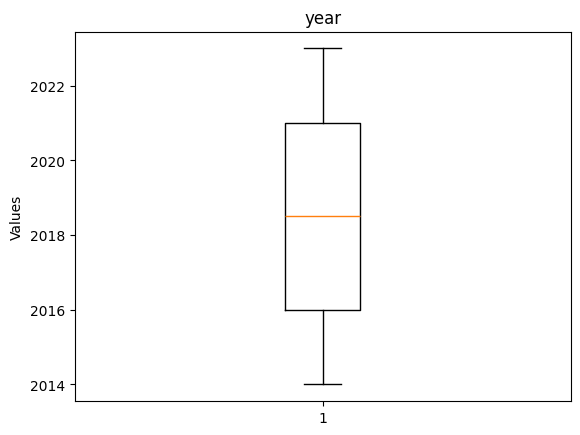

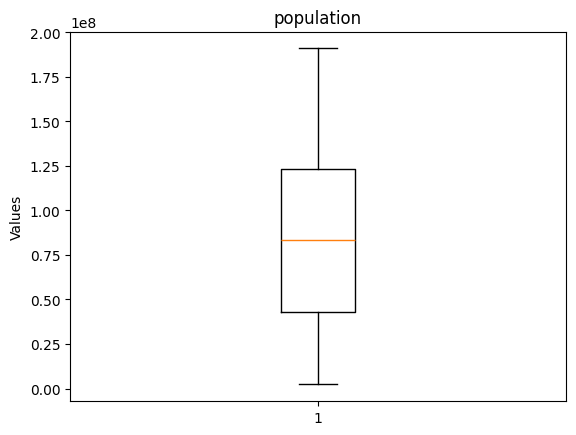

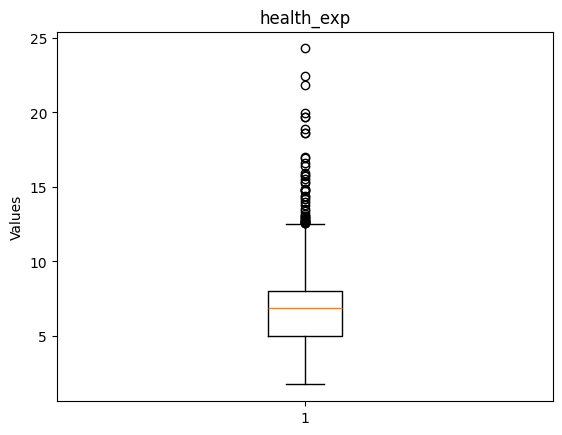

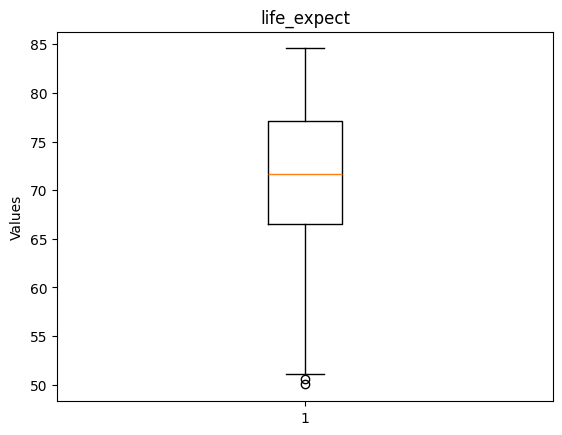

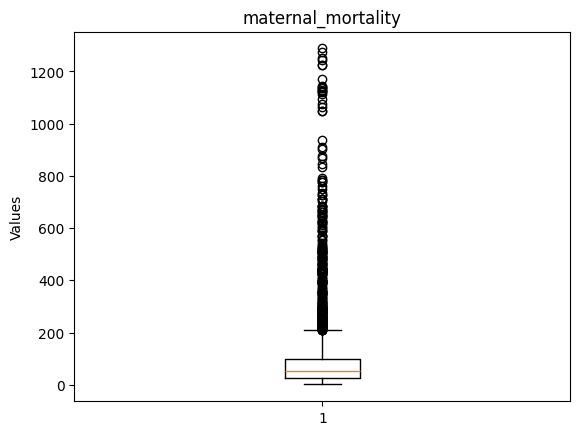

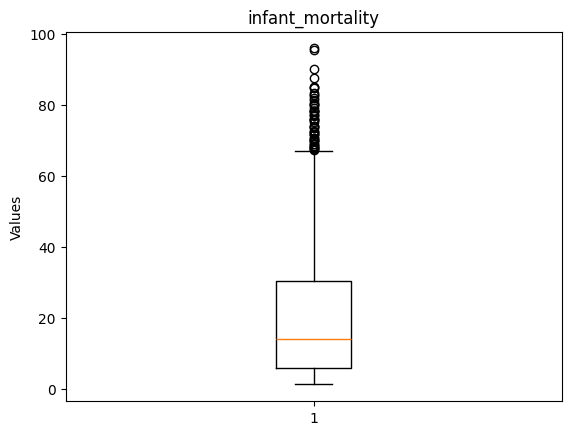

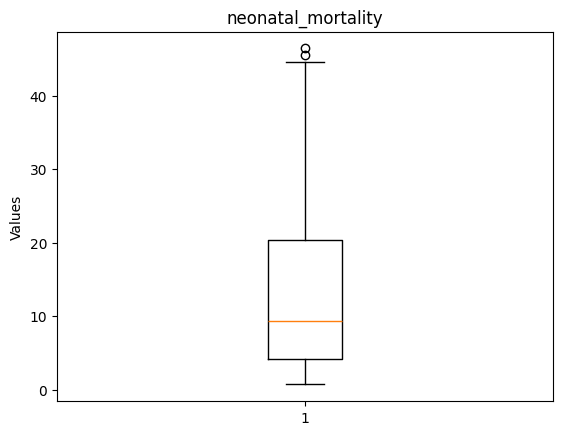

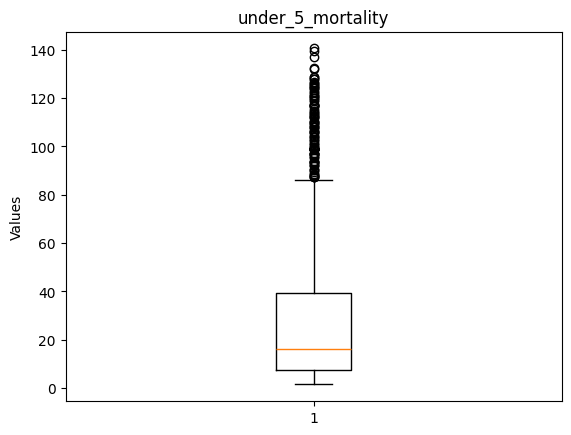

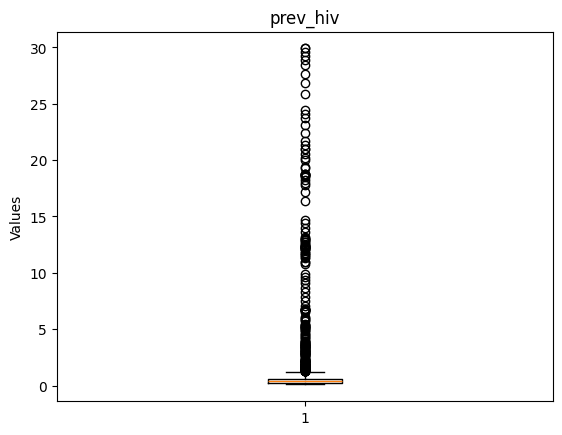

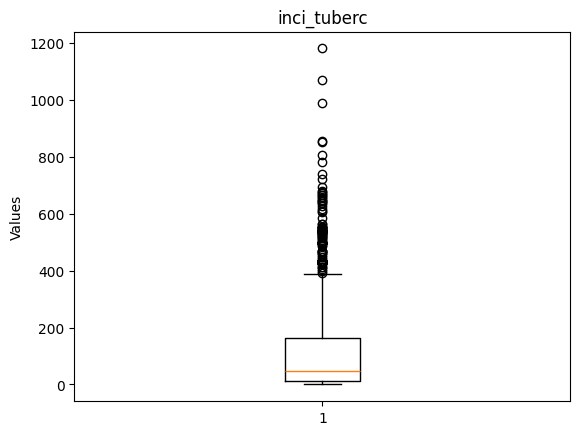

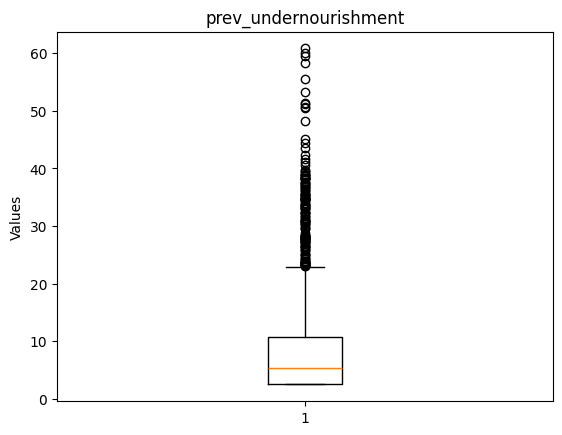

In [23]:
for col in df.select_dtypes(include='number').columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel('Values')
    plt.show()

Summary from above outliers analysis;

1. Under-5 Mortality: Although there are notable outliers with a median mortality rate of over 140 deaths per 1,000 live births, the overall mortality rate is mild, revealing stark regional differences in child health.

2. HIV Prevalence: The distribution shows numerious outliers, indicating certain countries experience a significant higher burden of HIV.

3. Tuberculosis Incidence: Shows extreme cases exceed 1,000 per 100,000 people, signaling severe TB outbreaks in specific countries.

4. Prevalence of Undernourishment: While most countries have low to moderate undernourishment rates, extreme cases surpassing 60% highlight severe food insecurity.

5. Maternal Mortality: This high values likely represent countries with weaker healthcare systems, limited maternal care, or high-risk conditions for childbirth.

6. Neonatal and Infant Mortality: Moderate medians mask high outliers, with some countries reporting over 50 deaths per 1,000 live births, reflecting disparities in early-life healthcare.

7. Healthcare Expenditure: This outliers could represent high-income countries with unique helthcare funding structure, and some countries with minimal resources allocate to healthcare.

In [24]:
df

,country,year,population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545000,785.0,56.20,43.5,75.30,0.1,189.0,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407000,7.0,8.80,5.9,9.90,0.1,16.0,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110000,86.0,22.00,15.8,25.70,0.1,72.0,2.7
3,Andorra,2014,133274038,AND,6.773080,71.646832,51.0,3.50,1.9,3.80,0.4,9.4,5.3
4,Angola,2014,35838921,AGO,2.434129,60.040000,292.0,60.30,31.5,92.50,1.9,370.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Uruguay,2023,69805797,URY,6.867564,71.646832,51.0,14.05,9.3,16.25,0.4,42.0,5.3
1666,Uzbekistan,2023,162931600,UZB,6.867564,71.646832,51.0,14.05,9.3,16.25,0.4,57.0,5.3
1667,Vanuatu,2023,84186452,VUT,6.867564,71.646832,51.0,14.05,9.3,16.25,0.4,41.0,5.3
1668,Zambia,2023,184919566,ZMB,6.867564,71.646832,51.0,14.05,9.3,16.25,0.4,283.0,5.3


## ANALYSIS

In [25]:
df.columns

Index(['country', 'year', 'population', 'country_code', 'health_exp',
       'life_expect', 'maternal_mortality', 'infant_mortality',
       'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc',
       'prev_undernourishment'],
      dtype='object')

In [26]:
#1. How have mortality rates (maternal, infant, neonatal, and under-5) changed over time, 
# and what do these changes indicate about healthcare improvements?
mortality_trends = df.groupby("year")[["maternal_mortality", "infant_mortality",
                                        "neonatal_mortality", "under_5_mortality"]].mean().reset_index()

print(mortality_trends)

   year  maternal_mortality  infant_mortality  neonatal_mortality  \
0  2014          163.646707         23.991916           14.114970   
1  2015          158.485030         23.378743           13.826946   
2  2016          152.311377         22.780539           13.556886   
3  2017          148.113772         22.212874           13.288024   
4  2018          145.886228         21.657784           13.028144   
5  2019          143.125749         21.136826           12.772455   
6  2020          142.143713         20.622455           12.513174   
7  2021           51.000000         20.105090           12.243713   
8  2022           51.000000         19.609281           11.968862   
9  2023           51.000000         14.050000            9.300000   

   under_5_mortality  
0          32.487725  
1          31.554790  
2          30.559581  
3          29.708084  
4          28.902096  
5          28.123054  
6          27.326647  
7          26.532635  
8          25.795509  
9         

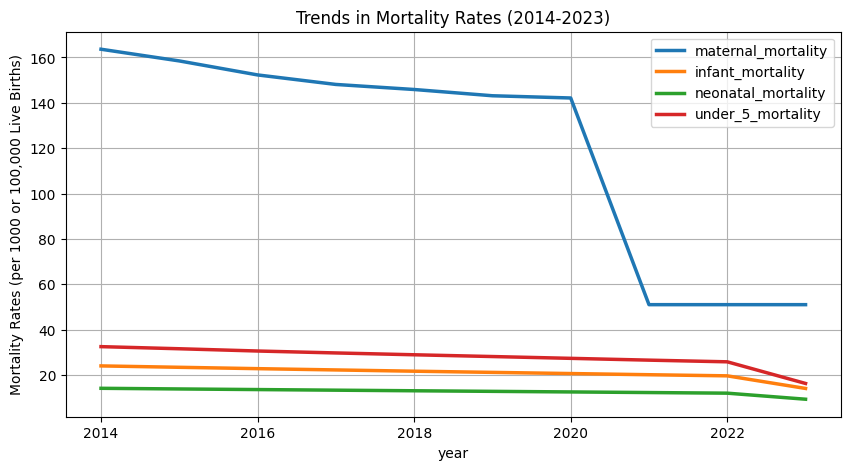

In [27]:

plt.figure(figsize=(10,5))
sns.lineplot(data=mortality_trends, x="year", y="maternal_mortality", markers="o", label="maternal_mortality", linewidth=2.5)
sns.lineplot(data=mortality_trends, x="year", y="infant_mortality", markers="o", label="infant_mortality", linewidth=2.5)
sns.lineplot(data=mortality_trends, x="year", y="neonatal_mortality", markers="o", label="neonatal_mortality", linewidth=2.5)
sns.lineplot(data=mortality_trends, x="year", y="under_5_mortality", markers="o", label="under_5_mortality", linewidth=2.5)

plt.legend
plt.xlabel("year")
plt.ylabel("Mortality Rates (per 1000 or 100,000 Live Births)")
plt.title("Trends in Mortality Rates (2014-2023)")
plt.grid(True)
plt.show()

Key Insights on Trends in Mortality Rates;

1. Steady Decline: improvements in healthcare have been demonstrated by steady decline in Maternal, infant, neonatal, and under-5 mortality rates.

2. Significant Drop in Maternal Mortality: A notable decline in maternal mortality from 2021 suggests major healthcare interventions.

3. Child Health Outcomes: The death rates for Infant, neonatal, and under-5 mortality rates have steadily reduced, likely as a better access healthcare, better nutrition, and more effective vaccinations.

4. Maternal Mortality: Despite improvements in overall mortality rates, maternal mortality still remains significantly higher, highlighting the need for more targeted medical interventions.

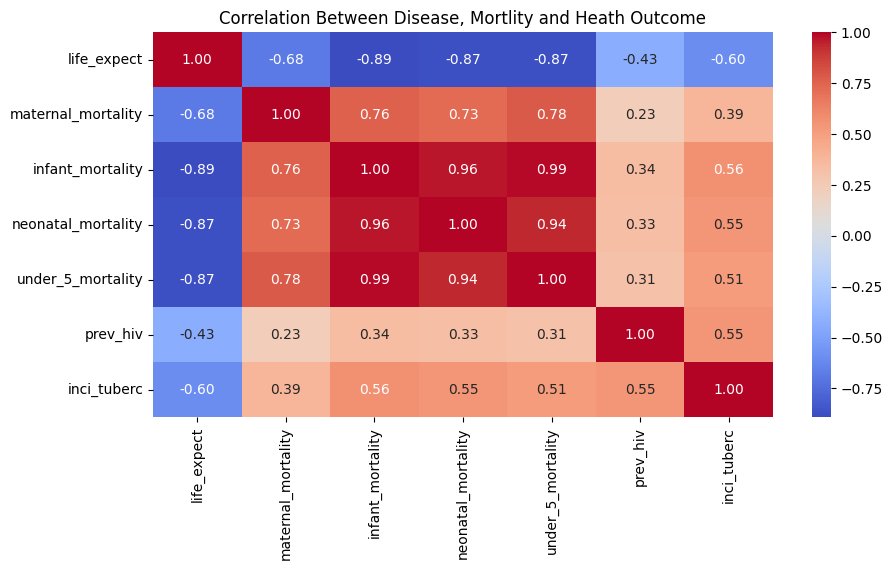

In [28]:
#2.How do HIV prevalence and tuberculosis incidence impact overall health outcomes, mortality rates, and population well-being?

corr_feats = ['life_expect', 'maternal_mortality', 'infant_mortality',
       'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc']
correlation_matrix = df[corr_feats].corr()
#print(correlation_matrix)

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Disease, Mortlity and Heath Outcome")
plt.show()

Key Insights on the Impact of HIV and Tuberculosis on Health Outcomes, Mortality rates, and Population Well-being;

1. With Higher HIV prevalence (-0.43) and tuberculosis incidence (-0.60) are associated with lower life expectancy, this indicates that these diseases contribute significantly to reduced population well-being.

2. HIV and tuberculosis are positively correlated with maternal, infant, neonatal, and under-5 mortality rates, implying that their prevalence worsens overall health outcomes.

3. The stronger correlation of tuberculosis with mortality rates compared to HIV implies that tuberculosis has a more acute and severe effect on population health.

4. Although HIV prevalence is correlated with mortality rates, its relatively lower correlation compared to tuberculosis suggests that with proper treatment, its direct impact on mortality can be mitigated.

5. Countries with high HIV and tuberculosis cases likely experience increased healthcare challenges, requiring stronger intervention programs to improve survival rates and overall well-being.

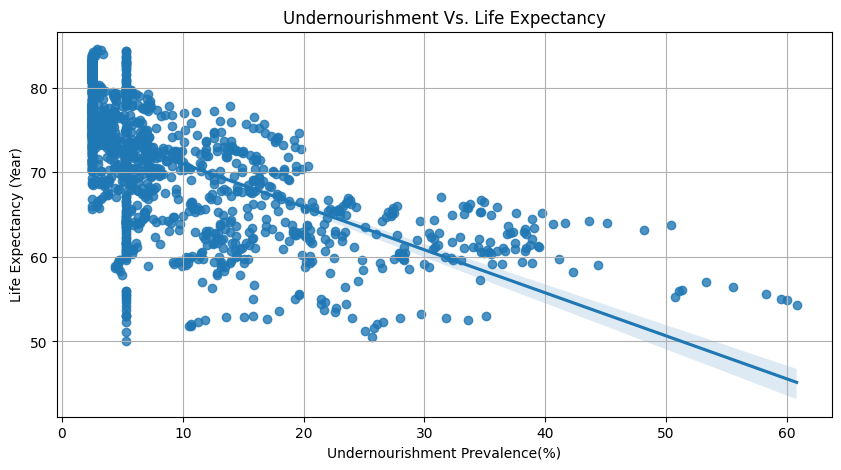

In [29]:
#3.	How does undernourishment prevalence affect life expectancy across different countries?
plt.figure(figsize=(10, 5))
sns.regplot(x="prev_undernourishment", y="life_expect", data=df)
plt.title("Undernourishment Vs. Life Expectancy")
plt.xlabel("Undernourishment Prevalence(%)")
plt.ylabel("Life Expectancy (Year)")
plt.grid()
plt.show()

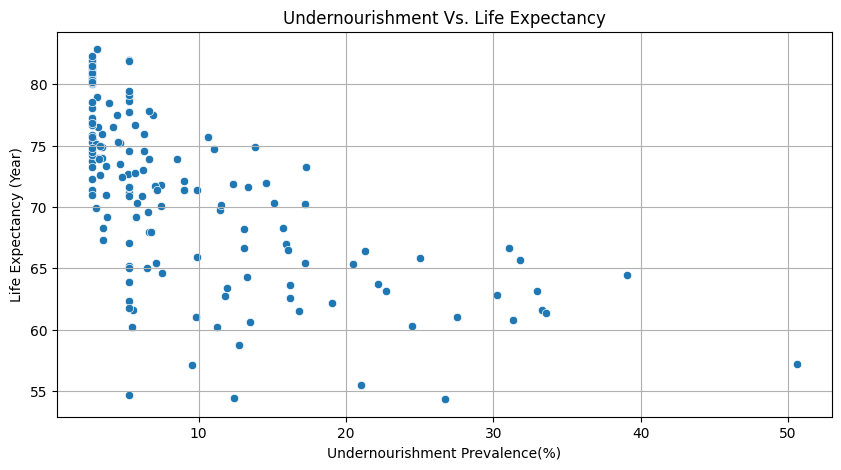

In [30]:
country_avg = df.groupby("country")[["prev_undernourishment", "life_expect"]].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(x="prev_undernourishment", y="life_expect", data=country_avg)

plt.title("Undernourishment Vs. Life Expectancy")
plt.xlabel("Undernourishment Prevalence(%)")
plt.ylabel("Life Expectancy (Year)")
plt.grid()
plt.show()

Insights on Effect of undernourishment prevalence on Life Expectancy Across Different Countries:

There is a negative correlation between undernourishment prevalence and life expectancy, indicating that countries with greater rates of undernourishment typically have lower life expectancies.

Countries with low undernourishment prevalence generally have life expectancy above 70 years, while those with high undernourishment prevalence often fall below 60 years.

The trend suggests that having access to heathy nutrition plays a crucial role in improving longevity and general health results.

Some countries with moderate undernourishment still maintain relatively high life expectancy, suggesting that other factors, such as healthcare and economic conditions, also contribute to longer lifespans.

Addressing undernourishment through improvng food security, healthcare, and economic growth in other to combat undernourishment could greatly improve life expectancy in affected areas.

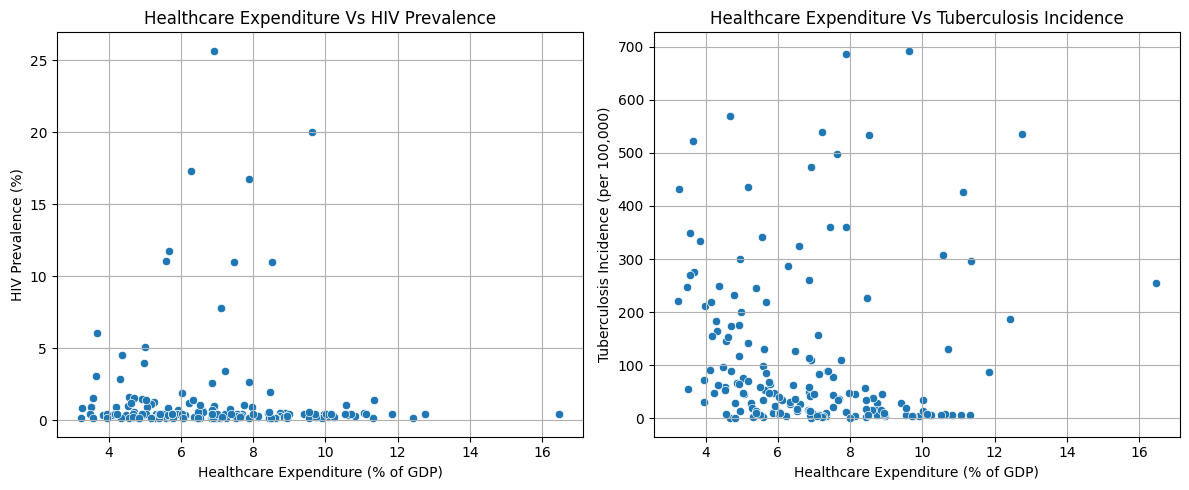

In [31]:
#4.	Do countries with higher healthcare expenditure have lower rates of HIV and tuberculosis?
ctry_avg = df.groupby("country")[["health_exp", "prev_hiv", "inci_tuberc"]].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x="health_exp", y="prev_hiv", data=ctry_avg, ax=axes[0])
axes[0].set_title("Healthcare Expenditure Vs HIV Prevalence")
axes[0].set_xlabel("Healthcare Expenditure (% of GDP)")
axes[0].set_ylabel("HIV Prevalence (%)")
axes[0].grid()

sns.scatterplot(x="health_exp", y="inci_tuberc", data=ctry_avg, ax=axes[1])
axes[1].set_title("Healthcare Expenditure Vs Tuberculosis Incidence")
axes[1].set_xlabel("Healthcare Expenditure (% of GDP)")
axes[1].set_ylabel("Tuberculosis Incidence (per 100,000)")
axes[1].grid()

plt.tight_layout()
plt.show()

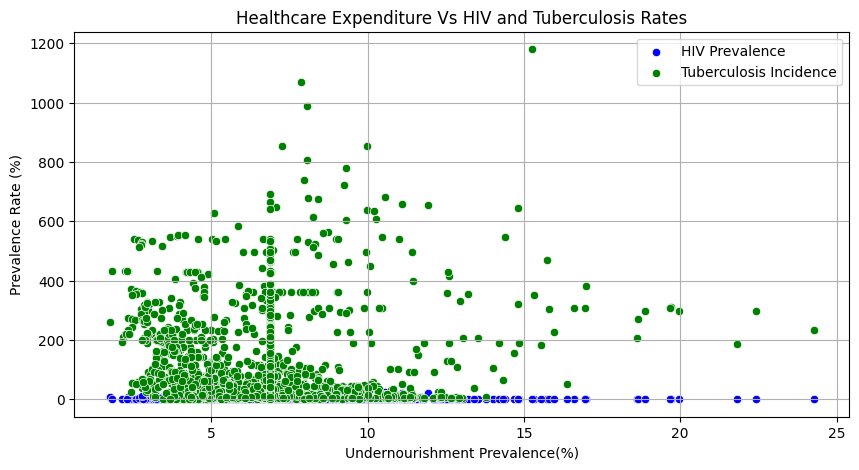

In [32]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=df["health_exp"], y=df["prev_hiv"], label="HIV Prevalence", color="blue")
sns.scatterplot(x=df["health_exp"], y=df["inci_tuberc"], label="Tuberculosis Incidence", color="green")

plt.title("Healthcare Expenditure Vs HIV and Tuberculosis Rates")
plt.xlabel("Undernourishment Prevalence(%)")
plt.ylabel("Prevalence Rate (%)")
plt.legend()
plt.grid()
plt.show()

Summary Insights on Healthcare Expenditures Vs HIV and Tuberculosis Rates:

HIV Prevalence vs. Healthcare Expenditure: 
Countries with higher healthcare expenditure tend to have lower HIV prevalence rates, while some low-expenditure countries still have high prevalence, suggesting that other factors such as government regulations, awareness initiatives, or ccess to medication also play a role.

Tuberculosis Incidence vs. Healthcare Expenditure:
Higher healthcare expenditure is generally associated with reduced tuberculosis incidence. Some countries with low-expenditure showd varying tuberculosis rates implying that healthcare infratructure and public health interventions could influence outcome.

The above supports the idea that better healthcare funding leads to improved disease prevenion and treatment.


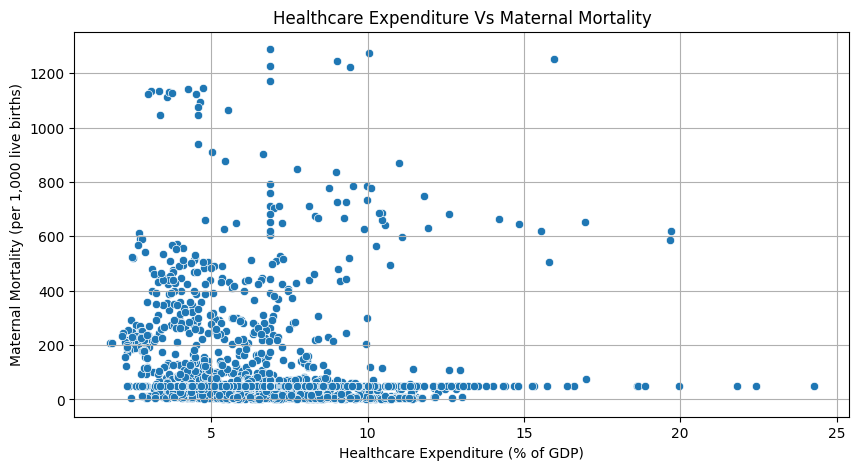

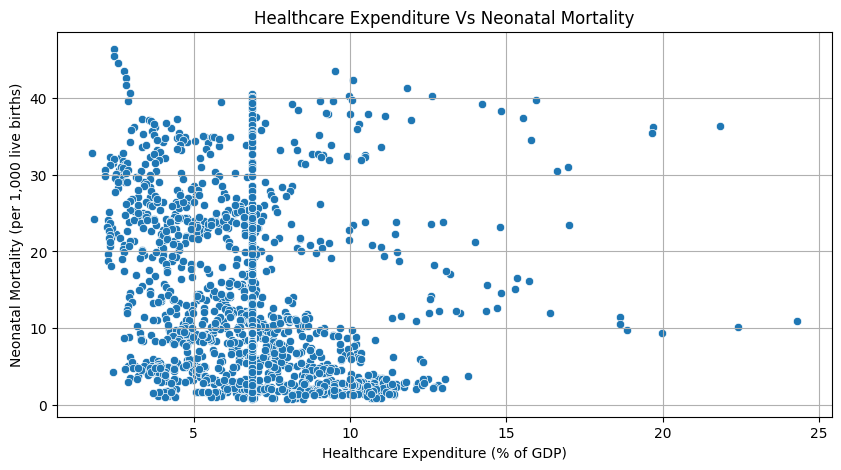

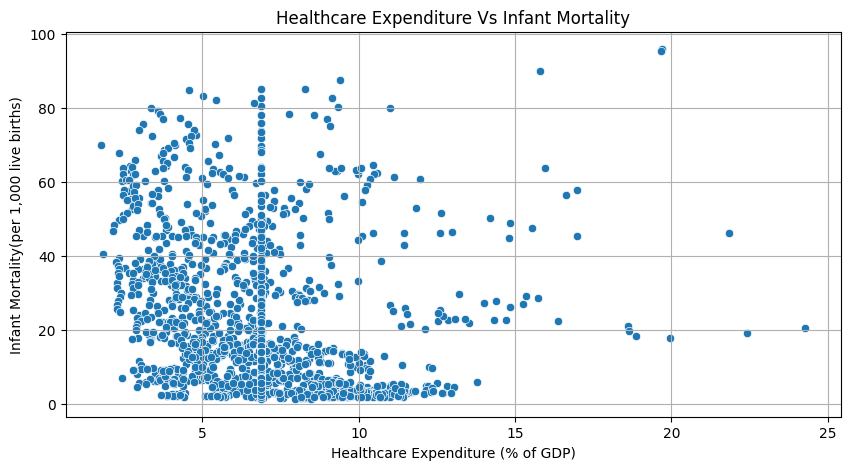

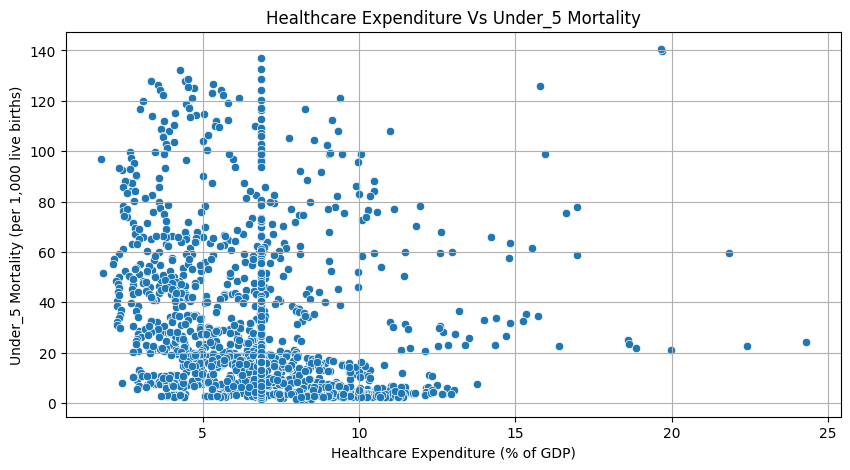

In [33]:
#5.	What is the relationship between healthcare expenditure and maternal, infant, neonatal, and under-5 mortality rates?

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["health_exp"], y=df["maternal_mortality"])
plt.title("Healthcare Expenditure Vs Maternal Mortality")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Maternal Mortality (per 1,000 live births)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["health_exp"], y=df["neonatal_mortality"])
plt.title("Healthcare Expenditure Vs Neonatal Mortality")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Neonatal Mortality (per 1,000 live births)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["health_exp"], y=df["infant_mortality"])
plt.title("Healthcare Expenditure Vs Infant Mortality")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Infant Mortality(per 1,000 live births)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["health_exp"], y=df["under_5_mortality"])
plt.title("Healthcare Expenditure Vs Under_5 Mortality")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Under_5 Mortality (per 1,000 live births)")
plt.grid(True)
plt.show()

INSIGHTS:

1. Healthcare Expenditure Vs Maternal Mortality:
While countries with higher healthcare expenditure (as a percentage of GDP) typically have lower maternal mortality rates, those countries spending less than 5% of GDP often experience high maternal deaths (above 200 per 1,000 live births). Typically, maternal mortality significantlly declines as healthcare expenditure surpasses 5-10% of GDP.

    High mortality clusters: A large concentration of counteries with low healthcare expenditure(less than 5% GDP) have maternal death rates greater han 400 per 1,000 live births, highlighting serious healthcare issues in this countries.

2. Healthcare Expenditure Vs Neonatal Mortality:
Countries with higher healthcare expenditure(% of GDP) tend to have lower neonatal mortality rates demonstrating the relevance of healthcare investment in lowering neonatal deaths.

    Few countries with healthcare expenditures exceeding 10% GDP still experience neonatal death rates above 20 per 1,000 live births, indicating that other factors such as quality of healthcare or socio-economic conditions may influence mortality rates.

3. Healthcare Expenditure Vs Infant Mortality:
The significance of investing in healthcare systems is further supported by the fact that lower infant mortality rates are typically linked to higher healthcare expenditures. 

    High Mortality in Low-Expenditure Countries: Infant mortality rates are often higher in countries that spend less than 5% of GDP on healthcare, frequently surpassing 40 fatalities for every 1,000 live births.

4. Healthcare Expenditure Vs Under_5 Mortality:
Lower under-5 death rates are typically linked to higher healthcare spending as a percentage of GDP, highlighting the significance of healthcare investment. 

    Countries with healthcare spending below 5% of GDP typically have under-5 mortality rates, with some surpassing 100 fatalities per 1,000 live births. 

    Few countries with healthcare spending above 10% of GDP yet have comparatively high under-5 mortality rates, suggesting factors like socio-economic conditions, healthcare quality, and accessibility significantly affect child survival rates.

In [34]:
#6.	Which countries have the best and worst health indicators based on mortality rates, and disease prevalence?

health_feats= ['maternal_mortality', 'infant_mortality', 'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc']
health_summary = df.groupby("country")[health_feats].mean().reset_index()

for col in health_feats:
    print(f"\nTop 10 Best Countries(Lowest {col:})")
    print(health_summary.nsmallest(10, col)[["country", col]])

    print(f"\nTop 10 Worst Countries(Highest {col:})")
    print(health_summary.nlargest(10, col)[["country", col]])


Top 10 Best Countries(Lowest maternal_mortality)
             country  maternal_mortality
14           Belarus                16.0
123           Poland                16.7
114           Norway                16.8
67           Iceland                17.4
72            Israel                17.4
113  North Macedonia                17.8
94             Malta                17.9
142            Spain                17.9
134       Seychelles                18.3
137         Slovenia                18.4

Top 10 Worst Countries(Highest maternal_mortality)
                      country  maternal_mortality
141               South Sudan               883.3
112                   Nigeria               796.1
31                       Chad               784.6
30   Central African Republic               633.2
0                 Afghanistan               507.3
62              Guinea-Bissau               506.0
139                   Somalia               497.9
84                    Liberia               490

Summary Analysis Based on top 10 Best and Worst countries for Mortality Rates and Disease Prevalence;

1. Maternal Mortality
Countries with the lowest maternal mortality rates include Belarus, Poland, Norway, IcelandIsrael, North Macedonia ,Malta, Spain, Seychelles, and Slovenia while high maternal mortality rates are seen in South Sudan, Nigeria, Chad, Central African Republic, Afghanistan, Guinea-Bissau, Somalia, Liberia, Lesotho, and Guinea.

2. Infant Mortality (per 1,000 live births)
Countries with the lowest infant mortality rates include San Marino, Japan, Finland, Estonia, Norway, Slovenia, Singapore, Iceland, Sweden, Luxembourg while high maternal mortality rates are seen in Sierra Leone,  Central African Republic, Somalia, Nigeria, Chad, Guinea, Mali, South Sudan, Niger, Equatorial Guinea.

3. Neonatal Mortality (per 1,000 live births)
Countries with the lowest Neonatal mortality rates include San Marino, Japan, Singapore, Estonia, Belarus Iceland, Finland, Slovenia, Norway, and Sweden. while high neonatal mortality rates are seen in Pakistan, South Sudan, Afghanistan, Somalia, Lesotho, Guinea-Bissau, Nigeria, Mali, Niger, and Chad.

4. Under_5 Mortality (per 1,000 live births)
Countries with the lowest Under_5 mortality rates include San Marino, Finland, Norway, Singapore, Slovenia, Estonia, Japan, Iceland, Luxembourg, Sweden. while high Under_5 mortality rates are seen in Niger, Somalia, Nigeria, Sierra Leone,         Chad, Central African Republic, Mali, Guinea, South Sudan, and Burkina Faso.

5. HIV Prevalence
Countries with the lowest HIV Prevalence  include Afghanistan, Albania, Algeria, Azerbaijan, Bangladesh,Bulgaria, Comoros, Croatia, Denmark, Iceland. While high HIV Prevalence are seen in Eswatini, Lesotho, Botswana, South Africa , Zimbabwe, Zambia, Namibia, Mozambique, Malawi, Equatorial, and Guinea.

6. Tuberculosis Incidence
Countries with the lowest Tuberculosis Incidence include San Marino, United Arab Emirates, Barbados, Monaco, Antigua and Barbuda, Iceland, Israel, Grenada, Jamaica, and Greece. While high HIV Prevalence are seen in Lesotho, South Africa, Philippines, Central African Republic, Marshall Islands, Namibia, Gabon, Timor-Leste, Eswatini, and Mongolia.

## INSIGHTS AND RECOMMENDATIONS

INSIGHTS

1. Healthcare Investment is significantly associated with impoved Health Outcomes: Countries with higher percentage of GDP healthcare allocation tend to have lower mortality rates (maternal, infant, neonatal, under_5) and lower disease prevalence (HIV, tuberculosis).

2. High Mortality and Disease Burden in Low-Income Countries
Nations with low healthcare expenditure (below 5% of GDP) often experience high mortality rates, along with higher prevalence of infectious diseases. These poor health outcomes are as a result of lack of limited infrastructures, preventive health measures and unavaliability of medical personnels.

3. Africa and South Asia experience higher HIV, tuberculosis, and mortality rates, driven by poverty, weak healthcare systems, and lack of preventive measures. While developed countries with universal healthcare systems consistently prioritize nutrition programs, disease screening, and public health education to improve better health outcomes.

4. Countries with strong immunization programs, prenatal care, and early childhood interventions report significantly lower maternal and child mortality rates.

5. Generally, this analysis emphasizes the importance role of healthcare investment, disease prevention, and effective policies in improving health outcomes. Countries that priortize universal healthcare access, preventive medicine, and socialeconomic determinants of health will achieve lower mortality rates, decreased disease prevalence, and longer life expectancy.

RECOMMENDATIONS

1. Countries should collaborate with global health organizations (WHO, UNICEF, Global Fund) to access funding, medical resources, and expertise in disease control. Regional cooperation on HIV/AIDS and tuberculosis prevention can improve health outcomes in affected areas.

2. Governments should allocate more percentage of GDP to healthcare to ensure access to essential health services, vaccinations, and maternal care.Strengthening health insurance schemes can improve affordability and accessibility, especially for low-income populations.

3. Governments should invest in public health education campaigns to improve awareness of HIV prevention, tuberculosis treatment, and maternal care. Vaccination, nutrition programs, and maternal healthcare initiatives can help reduce infant and child mortality.

4. Expanding healthcare facilities in rural areas, training more healthcare professionals, and ensuring availability of medicines can reduce geographical disparities in health access.

5. Countries should implement better health data tracking systems to monitor progress on mortality rates and disease control.
Evidence-based policymaking can help governments allocate resources more effectively and improve health planning.

6. Governments should invest in education, clean water, sanitation, and poverty reduction to create an environment where better health outcomes are sustainable. Social policies that improve nutrition, women’s empowerment, and healthcare access will have a long-term positive impact on health indicators.



# THANK YOU!!